<a href="https://colab.research.google.com/github/Ojas-Sri/Credit-Card-Default-Prediction/blob/main/Python%20Notebooks/Oversampling_%26_Cost_Sensitive_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import cross_val_score 

from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout

#importing libraries used
import numpy as np
import pandas as pd
from pprint import pprint
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,roc_auc_score,precision_recall_curve,recall_score,roc_curve,accuracy_score,precision_score,classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
import math

from keras.utils.vis_utils import plot_model

In [ ]:
def Find_Optimal_CutoffROC(tpr,fpr,y_pred,thresholds):
    gmeans=[]
    i=0
    for i in range (len(tpr)):
        gmeans.append(math.sqrt(tpr[i] * (1-fpr[i])))
    ix = np.argmax(gmeans)
    ROC(fpr,tpr,thresholds[ix],ix) 
    return thresholds[ix]

In [ ]:
def Find_Optimal_CutoffPR(pr,re,th,yvl):
    # convert to f score
    fscore = (2 * pr * re) / (pr+re+0.000001)
    # locate the index of the largest f score
    ix = np.argmax(fscore)
    print("========================")
    print('Best Threshold Precision-Recall Curve=%f, F-Score=%.3f' % (th[ix], fscore[ix]))
    prcurve(yvl,pr,re,ix)
    print("========================")
    return th[ix]

In [ ]:
#function for results
def results(y_test,y_pred):
    acc=accuracy_score(y_test, y_pred)
    pre=precision_score(y_test, y_pred)
    rec=recall_score(y_test, y_pred)
    print("========================")
    print("SCORES")
    print("Accuracy Score: ",acc)
    print("Precision Score: ",pre)
    print("Recall Score: ",rec)
    print("========================")
    y_actual = pd.Series(y_test, name='Actual')
    y_predict_tf = pd.Series(y_pred, name='Predicted')
    df_confusion = pd.crosstab(y_actual, y_predict_tf, rownames=['Actual'], colnames=['Predicted'], margins=True)
    print("========================")
    print("CONFUSION Matrix")
    print(df_confusion)
    print("========================")   
    print(classification_report(y_test,y_pred))
    print("========================")

In [ ]:
#function for plotting ROC
def ROC(fpr,tpr,threshold,ix):
    plt.figure()
    plt.plot([0,1], [0,1], linestyle="--",label='No Skill') # plot random curve
    plt.plot(fpr, tpr, marker='', label='Logistic')
    plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    # show the plot
    plt.show()

In [ ]:

#plotting PR curve
def prcurve(testy,precision,recall,ix):
    no_skill = len(testy[testy==1]) / len(testy)
    plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
    plt.plot(recall, precision, label='Logistic')
    plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
# show the plot
    plt.show() 

In [ ]:
#our_results
def our_results(X_train,X_test,y_train,y_test,y_pred):
    Y_pred = [1 if i >0.5 else 0 for i in y_pred]
    print("========================")
    print("==========BEFORE THRESHOLD==============")
    results(y_test,Y_pred)
    fpr,tpr, thresholds = roc_curve(y_test,y_pred)
    score= roc_auc_score(y_test, Y_pred)
    threshold_ROC=Find_Optimal_CutoffROC(tpr,fpr,y_pred,thresholds)
    precision, recall, th = precision_recall_curve(y_test, y_pred)
    threshold_PR=Find_Optimal_CutoffPR(precision,recall,th,y_test)
    print("========================")
    print('ROC AUC score:',score)
    print("Threshold for ROC: ",threshold_ROC)
    print("========================")
    Y_pred = [1 if i >threshold_ROC else 0 for i in y_pred]
    print("==========AFTER THRESHOLD ROC==============")
    results(y_test,Y_pred)
    print("========================")
    Y_pred = [1 if i >threshold_PR else 0 for i in y_pred]
    print("==========AFTER THRESHOLD PR CURVE==============")
    results(y_test,Y_pred)

In [ ]:
Y = df["def_pay"].copy()
df.drop(columns=["def_pay","ID"],axis=1,inplace=True)

X=df.copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
# Feature Scaling 
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)
y_train.shape

(22500,)

In [ ]:
input_dim = X_train.shape[1]

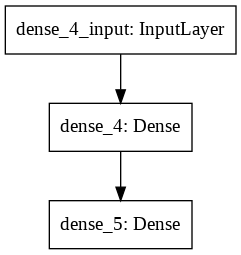

In [ ]:
model = Sequential()
model.add(Dense(28, input_shape=(input_dim,), activation='sigmoid'))
#model.add(Dense(256, activation='relu'))
#model.add(Dense(64, activation='relu'))
#model.add(Dense(64, activation='relu'))
#model.add(Dense(10, activation='relu'))
#model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1,  activation='sigmoid'))
plot_model(model)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

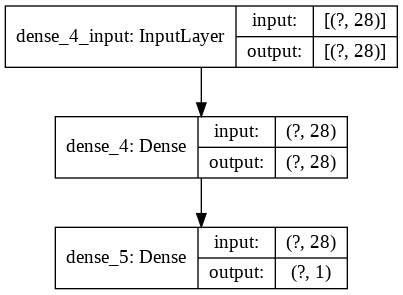

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
model0 = Sequential()
model0.add(Dense(28, input_shape=(input_dim,), activation='sigmoid',name="input"))
model0.add(Dense(14, activation='sigmoid',name="second"))
model0.add(Dense(1, activation='sigmoid',name="output"))
model0.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 28)                812       
_________________________________________________________________
second (Dense)               (None, 14)                406       
_________________________________________________________________
output (Dense)               (None, 1)                 15        
Total params: 1,233
Trainable params: 1,233
Non-trainable params: 0
_________________________________________________________________


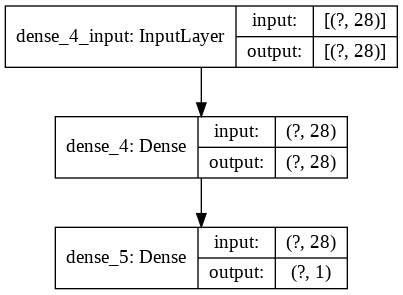

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
model0.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
print(Counter(y_train))
oversample = RandomUnderSampler(sampling_strategy='majority')
X_over, y_over = oversample.fit_resample(X_train, y_train)
print(Counter(y_over))

Counter({0: 17496, 1: 5004})
Counter({0: 5004, 1: 5004})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
history_dropout = model.fit(
    X_over,
    y_over,
    epochs=200,
    batch_size=50,
    validation_split=0.2,
    verbose = 1,
    shuffle=True,
    workers=2
)

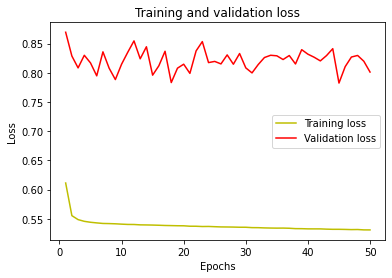

In [ ]:
loss = history_dropout.history['loss']
val_loss = history_dropout.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

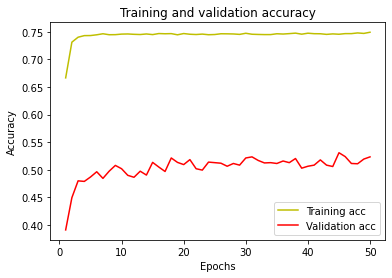

In [ ]:
acc = history_dropout.history['accuracy']
val_acc = history_dropout.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

==========BEFORE THRESHOLD==============
SCORES
Accuracy Score:  0.7994666666666667
Precision Score:  0.5407643312101911
Recall Score:  0.5202205882352942
CONFUSION Matrix
Predicted     0    1   All
Actual                    
0          1108  328  1436
1           324   92   416
All        1432  420  1852
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      5868
           1       0.54      0.52      0.53      1632

    accuracy                           0.80      7500
   macro avg       0.70      0.70      0.70      7500
weighted avg       0.80      0.80      0.80      7500



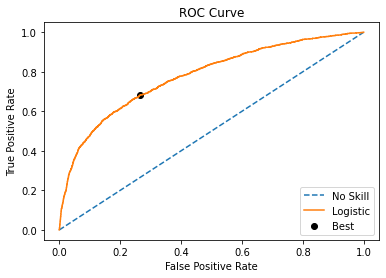

Best Threshold Precision-Recall Curve=0.451015, F-Score=0.537


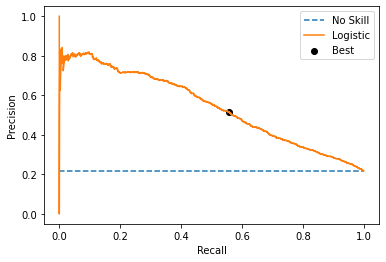

ROC AUC score: 0.6986753929588195
Threshold for ROC:  0.31909984
==========AFTER THRESHOLD ROC==============
SCORES
Accuracy Score:  0.7230666666666666
Precision Score:  0.41669786596780234
Recall Score:  0.6819852941176471
CONFUSION Matrix
Predicted     0    1   All
Actual                    
0           908  528  1436
1           254  162   416
All        1162  690  1852
              precision    recall  f1-score   support

           0       0.89      0.73      0.81      5868
           1       0.42      0.68      0.52      1632

    accuracy                           0.72      7500
   macro avg       0.65      0.71      0.66      7500
weighted avg       0.79      0.72      0.74      7500

==========AFTER THRESHOLD PR CURVE==============
SCORES
Accuracy Score:  0.7898666666666667
Precision Score:  0.515855039637599
Recall Score:  0.5582107843137255
CONFUSION Matrix
Predicted     0    1   All
Actual                    
0          1073  363  1436
1           308  108   416
All       

In [ ]:
y_test_pred = model.predict(np.array(X_test))
our_results(X_over,X_test,y_over,y_test,y_test_pred)

In [ ]:
history_dropout = model0.fit(
    X_over,
    y_over,
    epochs=250,
    batch_size=32,
    validation_split=0.2,
    verbose = 1,
    shuffle=True,
    workers=2
)

Epoch 1/250
251/251 [==============================] - 1s 4ms/step - loss: 0.6082 - accuracy: 0.6814 - val_loss: 0.8309 - val_accuracy: 0.4201
Epoch 2/250
251/251 [==============================] - 1s 3ms/step - loss: 0.5544 - accuracy: 0.7348 - val_loss: 0.7937 - val_accuracy: 0.5010
Epoch 3/250
251/251 [==============================] - 1s 3ms/step - loss: 0.5461 - accuracy: 0.7439 - val_loss: 0.8253 - val_accuracy: 0.5005
Epoch 4/250
251/251 [==============================] - 1s 3ms/step - loss: 0.5438 - accuracy: 0.7459 - val_loss: 0.8394 - val_accuracy: 0.5000
Epoch 5/250
251/251 [==============================] - 1s 3ms/step - loss: 0.5422 - accuracy: 0.7452 - val_loss: 0.8725 - val_accuracy: 0.4855
Epoch 6/250
251/251 [==============================] - 1s 3ms/step - loss: 0.5415 - accuracy: 0.7474 - val_loss: 0.7793 - val_accuracy: 0.5300
Epoch 7/250
251/251 [==============================] - 1s 3ms/step - loss: 0.5409 - accuracy: 0.7458 - val_loss: 0.7552 - val_accuracy: 0.5380

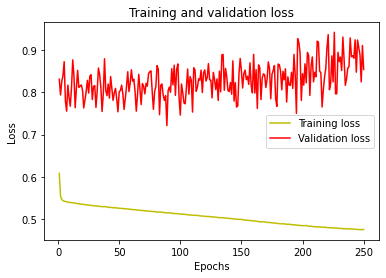

In [ ]:
loss = history_dropout.history['loss']
val_loss = history_dropout.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

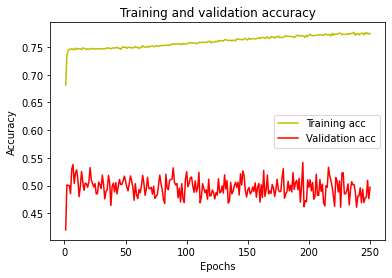

In [ ]:
acc = history_dropout.history['accuracy']
val_acc = history_dropout.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

==========BEFORE THRESHOLD==============
SCORES
Accuracy Score:  0.782
Precision Score:  0.49906890130353815
Recall Score:  0.49264705882352944
CONFUSION Matrix
Predicted     0    1   All
Actual                    
0          1105  331  1436
1           321   95   416
All        1426  426  1852
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      5868
           1       0.50      0.49      0.50      1632

    accuracy                           0.78      7500
   macro avg       0.68      0.68      0.68      7500
weighted avg       0.78      0.78      0.78      7500



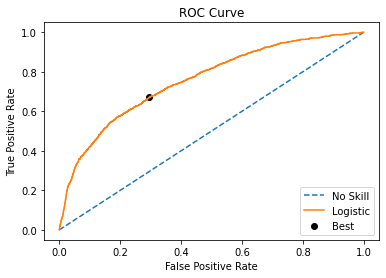

Best Threshold Precision-Recall Curve=0.454996, F-Score=0.508


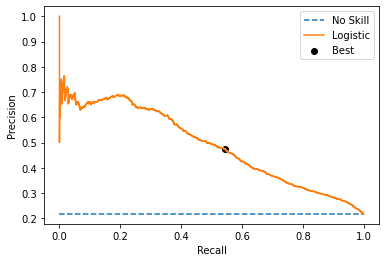

ROC AUC score: 0.6775607482256706
Threshold for ROC:  0.34780285
==========AFTER THRESHOLD ROC==============
SCORES
Accuracy Score:  0.6978666666666666
Precision Score:  0.3875886524822695
Recall Score:  0.6697303921568627
CONFUSION Matrix
Predicted     0    1   All
Actual                    
0           898  538  1436
1           254  162   416
All        1152  700  1852
              precision    recall  f1-score   support

           0       0.88      0.71      0.79      5868
           1       0.39      0.67      0.49      1632

    accuracy                           0.70      7500
   macro avg       0.64      0.69      0.64      7500
weighted avg       0.78      0.70      0.72      7500

==========AFTER THRESHOLD PR CURVE==============
SCORES
Accuracy Score:  0.7702666666666667
Precision Score:  0.47560321715817694
Recall Score:  0.5435049019607843
CONFUSION Matrix
Predicted     0    1   All
Actual                    
0          1063  373  1436
1           306  110   416
All      

In [ ]:
y_test_pred = model0.predict(np.array(X_test))
our_results(X_over,X_test,y_over,y_test,y_test_pred)